<a href="https://colab.research.google.com/github/praneeetha1/Recipe-Analysis/blob/main/recipe_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
irkaal_foodcom_recipes_and_reviews_path = kagglehub.dataset_download('irkaal/foodcom-recipes-and-reviews')

print('Data source import complete.')


Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodcom-recipes-and-reviews/recipes.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.csv
/kaggle/input/foodcom-recipes-and-reviews/recipes.csv


In [6]:
recipes_df = pd.read_csv('/kaggle/input/foodcom-recipes-and-reviews/recipes.csv')
reviews_df = pd.read_csv('/kaggle/input/foodcom-recipes-and-reviews/reviews.csv')

In [7]:
print(recipes_df.columns)
print(reviews_df.columns)

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')
Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')


In [8]:
columns_to_keep_recipes = [
    "RecipeId", "Name","AuthorId", "AuthorName", "CookTime", "PrepTime", "TotalTime", "Description",
    "Images", "RecipeCategory",
    "RecipeIngredientQuantities", "RecipeIngredientParts",
    "AggregatedRating", "ReviewCount",
    "RecipeServings", "RecipeInstructions", "Calories"
]

recipes_df = recipes_df[columns_to_keep_recipes]

print(recipes_df.columns)

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'Description', 'Images', 'RecipeCategory',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'RecipeServings',
       'RecipeInstructions', 'Calories'],
      dtype='object')


# Let's focus on the recipes dataset

In [9]:
# Renaming the columns to better names

col_rename = {
    "RecipeId": "recipe_id",
    "Name": "name",
    "AuthorId": "author_id",
    "AuthorName": "author_name",
    "CookTime": "cook_time",
    "PrepTime": "prep_time",
    "TotalTime": "total_time",
    "RecipeCategory": "category",
    "Description": "description",
    "Images": "image_url",
    "RecipeIngredientQuantities": "ingredient_qty",
    "RecipeIngredientParts": "ingredient_name",
    "RecipeServings": "servings",
    "RecipeInstructions": "instructions",
    "AggregatedRating": "aggregate_rating",
    "ReviewCount": "review_count",
    "Calories": "calories"
}
filtered_cols = list(col_rename.keys())


recipes_df = recipes_df[filtered_cols].rename(columns=col_rename)

In [10]:
recipes_df.head()

,recipe_id,name,author_id,author_name,cook_time,prep_time,total_time,category,description,image_url,ingredient_qty,ingredient_name,servings,instructions,aggregate_rating,review_count,calories
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,Frozen Desserts,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",4.5,4.0,170.9
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,Chicken Breast,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",6.0,"c(""Soak saffron in warm milk for 5 minutes and...",3.0,1.0,1110.7
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,Beverages,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",4.5,10.0,311.1
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,Soy/Tofu,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",2.0,"c(""Drain the tofu, carefully squeezing out exc...",4.5,2.0,536.1
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,Vegetable,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.0,"c(""Mix everything together and bring to a boil...",4.5,11.0,103.6


In [11]:
recipes_df.isnull().sum()

,0
recipe_id,0
name,0
author_id,0
author_name,0
cook_time,82545
prep_time,0
total_time,0
category,751
description,5
image_url,1


In [12]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   recipe_id         522517 non-null  int64  
 1   name              522517 non-null  object 
 2   author_id         522517 non-null  int64  
 3   author_name       522517 non-null  object 
 4   cook_time         439972 non-null  object 
 5   prep_time         522517 non-null  object 
 6   total_time        522517 non-null  object 
 7   category          521766 non-null  object 
 8   description       522512 non-null  object 
 9   image_url         522516 non-null  object 
 10  ingredient_qty    522514 non-null  object 
 11  ingredient_name   522517 non-null  object 
 12  servings          339606 non-null  float64
 13  instructions      522517 non-null  object 
 14  aggregate_rating  269294 non-null  float64
 15  review_count      275028 non-null  float64
 16  calories          52

## 1. handle time columns first

In [13]:
recipes_df[['cook_time', 'prep_time', 'total_time']]

,cook_time,prep_time,total_time
0,PT24H,PT45M,PT24H45M
1,PT25M,PT4H,PT4H25M
2,PT5M,PT30M,PT35M
3,PT20M,PT24H,PT24H20M
4,PT30M,PT20M,PT50M
...,...,...,...
522512,PT35M,PT1H,PT1H35M
522513,PT3H,PT30M,PT3H30M
522514,PT3H,PT1H,PT4H
522515,NaN,PT15M,PT15M


In [14]:
recipes_df[['cook_time', 'prep_time', 'total_time']].isnull().sum()

,0
cook_time,82545
prep_time,0
total_time,0


cook_time column had 82545 empty values, lets look at a few columns to see whats going on!

In [15]:
condition = recipes_df['cook_time'].isna() | (recipes_df['cook_time'] == 0)


filtered_df = recipes_df[condition]

cols = ['name', 'instructions','cook_time', 'prep_time', 'total_time']

## to view complete instructuions
with pd.option_context('display.max_colwidth', None):
    print(filtered_df[cols].iloc[0])

name                                                                                                                                                                                                                                                                                                                                                                                                                                A Jad - Cucumber Pickle
instructions    c("Slice the cucumber in four lengthwise, then slice the pieces to segments about an eighth of an inch thick.", "Slice the tops of the chilies (green ones can be used if red are not available, but Thais like the color contrast), tap out any loose seeds and discard, then slice the chilies across into thin rounds.", "Slice the shallots and water chestnuts.", "Combine and serve. This will keep 2 or 3 weeks in a refrigerator.")
cook_time                                                                                                       

In [16]:
with pd.option_context('display.max_colwidth', None):
    print(filtered_df[cols].iloc[15])

name                                                                                                                                    Caramel Apple Milkshakes
instructions    c("Place the yogurt, milk, cinnamon, and topping in a blender.", "Cover and blend  until smooth.", "Pour into 4 glasses.", "Serve immediately.")
cook_time                                                                                                                                                    NaN
prep_time                                                                                                                                                  PT25M
total_time                                                                                                                                                 PT25M
Name: 84, dtype: object


In [17]:
with pd.option_context('display.max_colwidth', None):
    print(filtered_df[cols].iloc[781])

name                                                                                                                                                                                                                                                                                                                                                                    Seven Layer Salad IV
instructions    c("Layer in the following order in a large 4-qt bowl: Lettuce, celery onion,  peas,bacon, cheese and spre  ad the mayonnaise mixture over all, sealing the  entire top to the edges.", "Refrigerate overnight without covering.", "Toss before  serving.", "Reduce the fat and calories by using no-fat mayonnaise,  reduced-fat cheese, and imitation low-fat bacon bits.")
cook_time                                                                                                                                                                                                                                     

as we can see, most empty cook_time values correspond to no-cook recipes like salads, milkshakes etc

In [18]:
import re

def parse_iso8601_duration(duration_str):
    """Convert ISO 8601 duration like PT4H25M to total minutes."""
    if pd.isna(duration_str):
        return 0
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?')
    match = pattern.fullmatch(duration_str.strip())
    if not match:
        return 0
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours * 60 + minutes

## converts NaN values in cook_time to 0 min

In [19]:
recipes_df['cook_time_min'] = recipes_df['cook_time'].apply(parse_iso8601_duration)
recipes_df['prep_time_min'] = recipes_df['prep_time'].apply(parse_iso8601_duration)
recipes_df['total_time_min'] = recipes_df['total_time'].apply(parse_iso8601_duration)

In [20]:
recipes_df[['cook_time', 'prep_time', 'total_time', 'cook_time_min', 'prep_time_min', 'total_time_min']].head()

,cook_time,prep_time,total_time,cook_time_min,prep_time_min,total_time_min
0,PT24H,PT45M,PT24H45M,1440,45,1485
1,PT25M,PT4H,PT4H25M,25,240,265
2,PT5M,PT30M,PT35M,5,30,35
3,PT20M,PT24H,PT24H20M,20,1440,1460
4,PT30M,PT20M,PT50M,30,20,50


since this doesnt look understandable - ill convert it to hrs and mins

In [21]:
recipes_df.drop(['cook_time', 'prep_time', 'total_time'], axis=1, inplace=True)

In [22]:
def format_minutes(minutes):
    if pd.isnull(minutes) or minutes == 0:
        return "0 min"
    hours = minutes // 60
    mins = minutes % 60
    if hours > 0 and mins > 0:
        return f"{hours} hr {mins:.1f} min"
    elif hours > 0:
        return f"{hours} hr"
    else:
        return f"{mins:.1f} min"


recipes_df['cook_time'] = recipes_df['cook_time_min'].apply(format_minutes)
recipes_df['prep_time'] = recipes_df['prep_time_min'].apply(format_minutes)
recipes_df['total_time'] = recipes_df['total_time_min'].apply(format_minutes)

In [23]:
recipes_df[['cook_time', 'prep_time', 'total_time', 'cook_time_min', 'prep_time_min', 'total_time_min']].head()

,cook_time,prep_time,total_time,cook_time_min,prep_time_min,total_time_min
0,24 hr,45.0 min,24 hr 45.0 min,1440,45,1485
1,25.0 min,4 hr,4 hr 25.0 min,25,240,265
2,5.0 min,30.0 min,35.0 min,5,30,35
3,20.0 min,24 hr,24 hr 20.0 min,20,1440,1460
4,30.0 min,20.0 min,50.0 min,30,20,50


## 2. category column

In [24]:
print("empty category values:", recipes_df['category'].isnull().sum())
unique_categories_count = recipes_df['category'].nunique(dropna=True)
print("total unique category types:", unique_categories_count)

empty category values: 751
total unique category types: 311


there are 311 categories that the recipes have been categorised into, since its quite a large number, I will group them into broader groups based on the common categories mentioned

In [25]:
top_categories = recipes_df['category'].value_counts().head(60)
print(top_categories)

category
Dessert                62072
Lunch/Snacks           32586
One Dish Meal          31345
Vegetable              27231
Breakfast              21101
Beverages              16076
Chicken                13249
Meat                   13131
Breads                 12804
Pork                   12603
Sauces                 12166
Chicken Breast         11282
Potato                 10870
Quick Breads           10387
< 60 Mins               9719
< 30 Mins               9020
Cheese                  8462
Pie                     7775
Bar Cookie              7029
Low Protein             6663
< 15 Mins               6662
Drop Cookies            6385
Stew                    5679
Yeast Breads            5523
Beans                   5463
Candy                   5229
Salad Dressings         5066
< 4 Hours               4969
Frozen Desserts         4804
Spreads                 4694
Poultry                 3925
Cheesecake              3915
Low Cholesterol         3807
European                3690
Smoot

In [26]:
category_map = {
    # Desserts and sweets
    'Dessert': 'Dessert',
    'Frozen Desserts': 'Dessert',
    'Cheesecake': 'Dessert',
    'Candy': 'Dessert',
    'Bar Cookie': 'Dessert',
    'Drop Cookies': 'Dessert',
    'Quick Breads': 'Bread',
    'Breads': 'Bread',
    'Yeast Breads': 'Bread',
    'Pie': 'Pie',
    'Savory Pies': 'Pie',
    'Cheese': 'Dairy',
    'Spreads': 'Condiments',
    'Salad Dressings': 'Condiments',

    # Meals and main courses
    'Lunch/Snacks': 'Meal',
    'One Dish Meal': 'Meal',
    'Breakfast': 'Meal',
    'Stew': 'Meal',
    'Roast Beef': 'Meat',
    'Healthy': 'Diet',

    # Poultry and meats
    'Poultry': 'Meat',
    'Chicken': 'Meat',
    'Chicken Breast': 'Meat',
    'Chicken Thigh & Leg': 'Meat',
    'Meat': 'Meat',
    'Pork': 'Meat',
    'Steak': 'Meat',
    'Ham': 'Meat',
    'Lamb/Sheep': 'Meat',

    # Seafood
    'Crab': 'Seafood',
    # Add more seafood if needed

    # Vegetables, legumes, grains, and fruits
    'Vegetable': 'Vegetarian',
    'Beans': 'Vegetarian',
    'Potato': 'Vegetarian',
    'Onions': 'Vegetarian',
    'Spinach': 'Vegetarian',
    'Greens': 'Vegetarian',
    'Yam/Sweet Potato': 'Vegetarian',
    'Corn': 'Vegetarian',
    'Fruit': 'Fruit',
    'Grains': 'Grains',
    'Rice': 'Grains',
    'Spaghetti': 'Grains',

    # Beverages and drinks
    'Beverages': 'Beverage',
    'Punch Beverage': 'Beverage',
    'Smoothies': 'Beverage',

    # Sauces, condiments, and related
    'Sauces': 'Condiments',
    'Spreads': 'Condiments',
    'Salad Dressings': 'Condiments',

    # Dietary categories
    'Low Cholesterol': 'Diet',
    'Low Protein': 'Diet',
    'Very Low Carbs': 'Diet',
    'Healthy': 'Diet',

    # Regional cuisines
    'European': 'Cuisine',
    'Asian': 'Cuisine',
    'Mexican': 'Cuisine',

    # Cooking or time-based categories
    '< 60 Mins': 'Meal',
    '< 30 Mins': 'Meal',
    '< 15 Mins': 'Meal',
    '< 4 Hours': 'Meal',

    # Soup and chowders
    'Clear Soup': 'Soup',
    'Chowders': 'Soup',
    # Curries and similar
    'Curries': 'Curry',
}


recipes_df['category_grouped'] = recipes_df['category'].map(category_map).fillna('Other')

In [27]:
print(recipes_df['category_grouped'].value_counts())
unique_categories_count = recipes_df['category_grouped'].nunique(dropna=True)
print("Total unique category types:", unique_categories_count)

category_grouped
Meal          121081
Dessert        89434
Meat           64357
Other          59346
Vegetarian     54727
Bread          28714
Condiments     21926
Beverage       21807
Diet           15576
Pie            10830
Dairy           8462
Cuisine         8005
Grains          6880
Soup            3805
Curry           2828
Fruit           2568
Seafood         2171
Name: count, dtype: int64
Total unique category types: 17


In [28]:
print("Empty category values:", recipes_df['category'].isnull().sum())

Empty category values: 751


In [29]:
!pip install transformers --quiet

from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


category_labels = [
    "Meal", "Dessert", "Meat", "Vegetarian", "Bread", "Beverage",
    "Condiments", "Diet", "Pie", "Cuisine", "Grains", "Curry",
    "Seafood", "Other", "Dairy", "Soup", "Fruit"
]



# classifying recipes into catgory_labels based on the recipe title/name
def classify_recipe_category(name):
    try:
        result = classifier(name, category_labels)
        return result['labels'][0]
    except:
        return "Other"


# run an example test
sample_names = recipes_df['name'].head(10)
for name in sample_names:
    print(f"Recipe: {name}\nPredicted category: {classify_recipe_category(name)}\n")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Recipe: Low-Fat Berry Blue Frozen Dessert
Predicted category: Dessert

Recipe: Biryani
Predicted category: Cuisine

Recipe: Best Lemonade
Predicted category: Beverage

Recipe: Carina's Tofu-Vegetable Kebabs
Predicted category: Cuisine

Recipe: Cabbage Soup
Predicted category: Soup

Recipe: Best Blackbottom Pie
Predicted category: Pie

Recipe: Warm Chicken A La King
Predicted category: Cuisine

Recipe: Buttermilk Pie With Gingersnap Crumb Crust
Predicted category: Pie

Recipe: A Jad - Cucumber Pickle
Predicted category: Fruit

Recipe: Butter Pecan Cookies
Predicted category: Dessert



In [30]:
!pip install datasets --quiet
from datasets import Dataset
from transformers import pipeline
from tqdm import tqdm
import torch


device = 0 if torch.cuda.is_available() else -1
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=device
)


category_labels = [
    "Meal", "Dessert", "Meat", "Vegetarian", "Bread", "Beverage",
    "Condiments", "Diet", "Pie", "Cuisine", "Grains", "Curry",
    "Seafood", "Other", "Dairy", "Soup", "Fruit"
]


missing_category_names = recipes_df.loc[recipes_df['category'].isnull(), 'name'].tolist()
# convert list to dataset object
hf_dataset = Dataset.from_dict({"text": missing_category_names})


def classify_batch(batch):
  results = classifier(batch["text"], candidate_labels=category_labels)
  batch["predicted_label"] = [res['labels'][0] for res in results]
  return batch


results_dataset = hf_dataset.map(classify_batch, batched=True, batch_size=32, desc="Classifying recipes")

predicted_labels = results_dataset["predicted_label"]
recipes_df.loc[recipes_df['category'].isnull(), 'category_grouped'] = predicted_labels


print("Classification done!")
print("Remaining missing categories:", recipes_df['category_grouped'].isnull().sum())

Device set to use cuda:0


Classifying recipes:   0%|          | 0/751 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Classification done!
Remaining missing categories: 0


In [31]:
recipes_df[['name', 'category', 'category_grouped']].iloc[722:733]

,name,category,category_grouped
722,Red Pepper Spoon Bread,Breads,Bread
723,Rice Case for Quiches or Pies (Gluten-Free),Pie,Pie
724,Rice-Bacon Pineapple Salad,Pineapple,Other
725,Roasting Peppers,Peppers,Other
726,Rock Candy for Kids,Candy,Dessert
727,Rum Baked Beans,Beans,Vegetarian
728,Bread Machine Sage-Wheat Bread,Yeast Breads,Bread
729,Beef Crumble,Meat,Meat
730,Salsa,Sauces,Condiments
731,Salty Milk Biscuits,Breads,Bread


## 3. description column

In [32]:
recipes_df['description'].isnull().sum()

np.int64(5)

In [33]:
recipes_df[recipes_df['description'].isna()]

,recipe_id,name,author_id,author_name,category,description,image_url,ingredient_qty,ingredient_name,servings,...,aggregate_rating,review_count,calories,cook_time_min,prep_time_min,total_time_min,cook_time,prep_time,total_time,category_grouped
3416,5177,Herb Pull-Aparts,1552,Ron Joyce Ripple S,Breads,NaN,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""1 1/2"", ""1/4"", ""1"", ""1"", ""1"", ""1"", ""1"", ""1/4"")","c(""butter"", ""margarine"", ""parmesan cheese"", ""r...",24.0,...,5.0,4.0,35.5,0,0,0,0 min,0 min,0 min,Bread
3526,5300,Chicken Liver Parfait,1992,Jackie Roe-Lawton,Chicken Livers,NaN,character(0),"c(""2"", ""1 1/2"", ""900"", ""9"", ""8"", ""1"", NA)","c(""sweet sherry"", ""chicken livers"", ""eggs"", ""n...",1.0,...,NaN,NaN,4650.2,0,0,0,0 min,0 min,0 min,Other
3645,5428,Hot Swiss Chard Salad,1534,Tonkcats,Swiss,NaN,NaN,"c(""1"", ""1/3"", ""10 -12"", ""1/4"", ""1/4"", NA, ""2"",...","c(""garlic"", ""fresh swiss chard"", ""red wine vin...",1.0,...,5.0,5.0,928.6,0,0,0,0 min,0 min,0 min,Other
4590,7426,Hidden Valley Mix for Dressing(copycat),1534,Tonkcats,Salad Dressings,NaN,character(0),"c(""2"", ""1/2"", ""1"", ""1"", ""1/2"", ""1"", ""1"")","c(""salt"", ""garlic powder"", ""parsley flakes"", ""...",NaN,...,NaN,NaN,119.9,0,0,0,0 min,0 min,0 min,Condiments
4591,7427,Cranberry Cocktail Meatballs,1534,Tonkcats,Fruit,NaN,character(0),"c(""2"", ""1"", ""2"", ""1/2"", ""1/3"", ""3"", ""2"", ""1/4""...","c(""beef"", ""eggs"", ""parsley"", ""ketchup"", ""onion...",6.0,...,4.5,5.0,1264.1,0,0,0,0 min,0 min,0 min,Fruit


since there are only 5 rows with empty descriptions, ill remove those columns

In [34]:
recipes_df = recipes_df.dropna(subset=['description'])
print("remaining missing description: ", recipes_df['description'].isnull().sum())

remaining missing description:  0


## 4. image url column

In [35]:
recipes_df['image_url'][0]

'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg", \n"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg")'

every value in image_url column is a list of image urls

In [36]:
recipes_df['image_url'][4:10]

,image_url
4,"""https://img.sndimg.com/food/image/upload/w_55..."
5,character(0)
6,"""https://img.sndimg.com/food/image/upload/w_55..."
7,"""https://img.sndimg.com/food/image/upload/w_55..."
8,character(0)
9,"c(""https://img.sndimg.com/food/image/upload/w_..."


In [37]:
import re

def extract_first_image_url(raw):
    """Clean R-style vector string or markdown URL entry and return the first usable image URL."""
    if not isinstance(raw, str) or "character(0" in raw or raw.strip() == "":
        return ""  # Treat character(0) or empty as missing

    cleaned = re.sub(r'^c\(|\)$', '', raw).strip()
    parts = re.split(r'"\s*,\s*"', cleaned.strip('"'))

    first = parts[0].strip()
    match = re.search(r'\[(https?://.*?)\]', first)
    return match.group(1) if match else first

recipes_df['image_url'] = recipes_df['image_url'].apply(extract_first_image_url)


In [38]:
recipes_df['image_url'][4:10]

,image_url
4,https://img.sndimg.com/food/image/upload/w_555...
5,
6,https://img.sndimg.com/food/image/upload/w_555...
7,https://img.sndimg.com/food/image/upload/w_555...
8,
9,https://img.sndimg.com/food/image/upload/w_555...


In [39]:
(recipes_df['image_url'] == "").sum()

np.int64(356617)

In [40]:
recipes_df['image_url'] = recipes_df['image_url'].replace("", "Unknown")

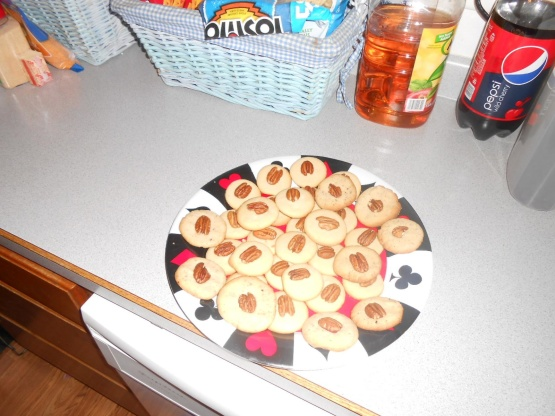

In [41]:
from PIL import Image
from IPython.display import display
import requests
from io import BytesIO

url = recipes_df['image_url'][9]

if url == "Unknown":
    print("Image not available")
else:
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        display(img)
    except Exception as e:
        print("Failed to load image:", e)

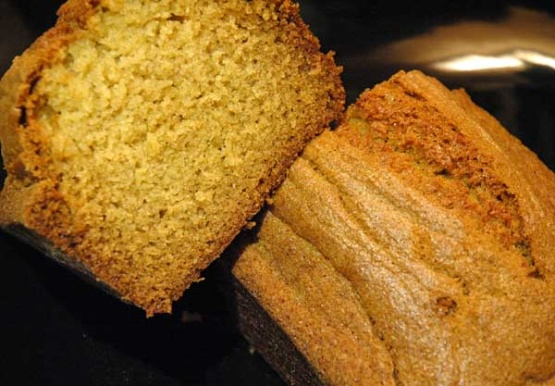

In [42]:
url = recipes_df['image_url'][45]

if url == "Unknown":
    print("Image not available")
else:
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        display(img)
    except Exception as e:
        print("Failed to load image:", e)

In [43]:
url = recipes_df['image_url'][117]

if url == "Unknown":
    print("Image not available")
else:
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        display(img)
    except Exception as e:
        print("Failed to load image:", e)

Image not available


## 5. lets clean up the columns: cook_time, ingredient_gty, ingredient_name, instructions and keywords

In [44]:
import re

def clean_r_vector_string(val):
    if not isinstance(val, str):
        return val
    # remove `c(` and ending `)` and quotes
    cleaned = re.sub(r'^c\(|\)$', '', val)
    return [x.strip().strip('"').strip("'") for x in cleaned.split(',') if x.strip()]

recipes_df['ingredient_name'] = recipes_df['ingredient_name'].apply(clean_r_vector_string)
recipes_df['ingredient_qty'] = recipes_df['ingredient_qty'].apply(clean_r_vector_string)
recipes_df['instructions'] = recipes_df['instructions'].apply(clean_r_vector_string)

## 6. rest of the empty values

In [45]:
recipes_df = recipes_df.dropna(subset=['ingredient_qty'])

# Moving on to reviews dataset

In [46]:
reviews_df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [47]:
reviews_df.drop(columns = ['DateModified'], inplace = True)

reviews_df.rename(columns={
    'ReviewId': 'review_id',
    'RecipeId': 'recipe_id',
    'AuthorId': 'author_id',
    'AuthorName': 'author_name',
    'Rating': 'rating',
    'Review': 'review',
    'DateSubmitted': 'date_submitted'
}, inplace=True)

In [48]:
reviews_df.isnull().sum()

,0
review_id,0
recipe_id,0
author_id,0
author_name,0
rating,0
review,214
date_submitted,0


In [49]:
reviews_df['review'] = reviews_df['review'].fillna("No review text provided.")
reviews_df['date_submitted'] = pd.to_datetime(reviews_df['date_submitted']).dt.date

In [50]:
reviews_df[5:7]

,review_id,recipe_id,author_id,author_name,rating,review,date_submitted
5,17,5221,2046,Gay Gilmore ckpt,4,"love it, but without the bean sprouts.",2000-05-08
6,19,13307,2046,Gay Gilmore ckpt,5,"chewy goodness, not crispy at all. i even thre...",2000-05-21


## Time to join the two datsets
### cause i really want to take a look at the reviews for a few recipes
### since the columns in reviews are lesser, ill join recipes_df to reviews_df, so that all recipes have reviews and ratings.

In [51]:
combined_df = reviews_df.merge(
    recipes_df,
    on='recipe_id',
    how='left',
    suffixes = ('_review', '_recipe')
)

In [52]:
combined_df.columns

Index(['review_id', 'recipe_id', 'author_id_review', 'author_name_review',
       'rating', 'review', 'date_submitted', 'name', 'author_id_recipe',
       'author_name_recipe', 'category', 'description', 'image_url',
       'ingredient_qty', 'ingredient_name', 'servings', 'instructions',
       'aggregate_rating', 'review_count', 'calories', 'cook_time_min',
       'prep_time_min', 'total_time_min', 'cook_time', 'prep_time',
       'total_time', 'category_grouped'],
      dtype='object')

In [53]:
from IPython.display import Image, display

## defining a function to print everything
def print_recipe_review(row):
    print(f"Recipe Name: {row['name']}")
    print(f"Recipe Author: {row['author_name_recipe']}")
    print(f"Description: {row['description']}")
    print(f"Category: {row['category_grouped']}\n")

    print("Ingredients:")
    for qty, name in zip(row['ingredient_qty'], row['ingredient_name']):
        print(f"  - {qty} {name}")

    print("\nInstructions:")
    for step in row['instructions']:
        print(f"  • {step}")

    print(f"\nPrep Time: {row['prep_time']}")
    print(f"Cook Time: {row['cook_time']}")
    print(f"Total Time: {row['total_time']}")

    print(f"\n Image URL: {row['image_url']}\n")
    display(Image(url=row['image_url']))

    print(f"Review by {row['author_name_review']}:")
    print(f"Rating: {row['rating']}/5")
    print(f"\"{row['review']}\"")


print_recipe_review(combined_df.iloc[0])

Recipe Name: Jalapeno Pepper Poppers
Recipe Author: Nancy Van Ess
Description: Make and share this Jalapeno Pepper Poppers recipe from Food.com.
Category: Vegetarian

Ingredients:
  - 8 cream cheese
  - 4 sharp cheddar cheese
  - 4 monterey jack cheese
  - 6 bacon
  - 1/4 salt
  - 1/4 chili powder
  - 1/4 garlic powder

Instructions:
  • In a mixing bowl
  • combine cheeses
  • bacon and seasonings.; mix well.
  • Spoon about  2 Tbs. into each pepper half.
  • Roll in bread crumbs.
  • Place in a greased 15x10x1\"  baking pan.
  • Bake
  • uncovered
  • 300 degrees for 20 minute for spicy flavor
  • 30 minute  for med. and 40 minute for mild.
  • Serve with sour cream or dressing.
  • NOTES : When cutting or seeding hot peppers
  • use rubber or plastic gloves to  protect your hands. avoid touching your face. I omit the bacon in this recipe.

Prep Time: 30.0 min
Cook Time: 0 min
Total Time: 30.0 min

 Image URL: https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,

Review by gayg msft:
Rating: 5/5
"better than any you can get at a restaurant!"


In [54]:
print_recipe_review(combined_df.iloc[780])

Recipe Name: Creamsicle Cocktail
Recipe Author: Dave5003
Description: Make and share this Creamsicle Cocktail recipe from Food.com.
Category: Beverage

Ingredients:
  - 1 triple sec
  - 3 vodka
  - 12 vanilla ice cream

Instructions:
  • Blenderize all and serve in tall glasses.

Prep Time: 0 min
Cook Time: 0 min
Total Time: 0 min

 Image URL: Unknown



Review by katz3355:
Rating: 5/5
"Easy to make, sweet, tangy, creamy, I added 1/2 a banana and an 1/2 ounce of coconut rum to give it a more fruity taste..Great drink!"


In [55]:
print_recipe_review(combined_df.iloc[1234])

Recipe Name: Amish Biscuits
Recipe Author: tranch
Description: Make and share this Amish Biscuits recipe from Food.com.
Category: Bread

Ingredients:
  - 1 all-purpose flour
  - 1/2 baking soda
  - 1/2 salt
  - 2 baking powder
  - 2 eggs
  - 1 butter

Instructions:
  • In a large bowl combine flour
  • baking soda
  • salt and baking powder.
  • In a separate bowl combine eggs
  • Amish Starter and oil.
  • Mix well.
  • Add starter to dry ingredients and mix until dough pulls away from sides  of bowl.
  • Transfer to a lightly floured surface and roll until 1/2 inch  thick.
  • Using a 3 inch circle cutter or floured glass cut out biscuits and  place on a lightly grease cookie sheet. Brush top of biscuits with melted  butter.
  • Cover and let rise 30 minutes.
  • Bake in a preheated 350 degree oven for 15 - 20 minutes.

Prep Time: 0 min
Cook Time: 0 min
Total Time: 0 min

 Image URL: https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/14/20/i

Review by linda mooney:
Rating: 0/5
"What is the recipe for the amish starter mix for the Amish biscuits."


# Time to explore and visualise the data to answer some questions!!

## What are the most common recipe categories?

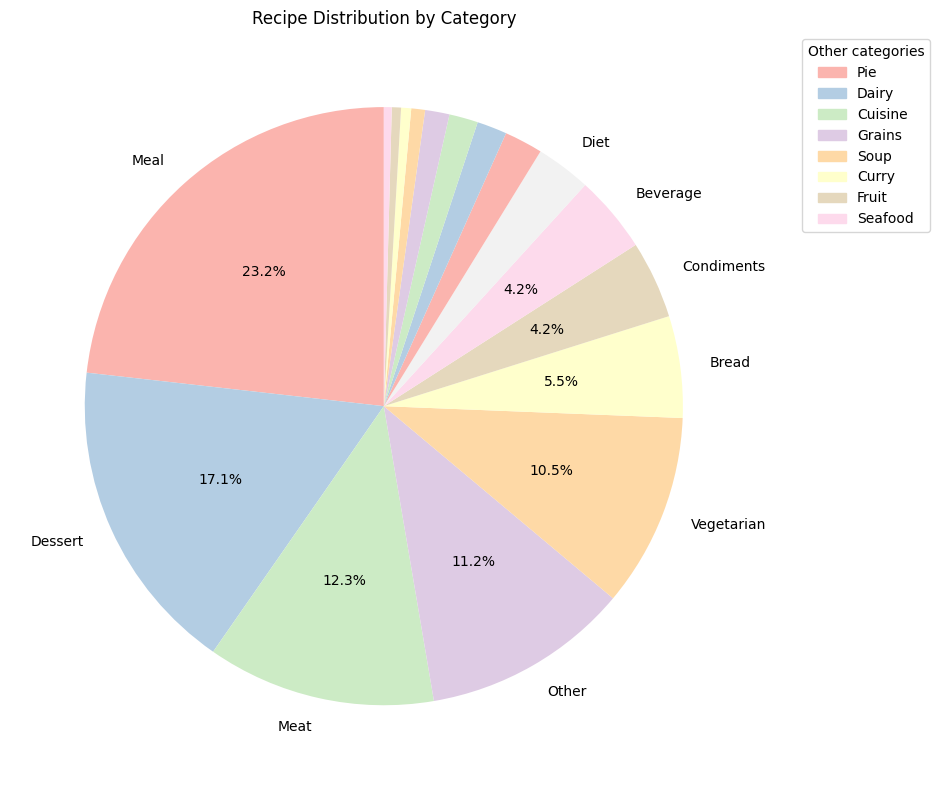

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10,8))

counts = recipes_df['category_grouped'].value_counts()
num_hide = 8

labels_to_show = list(counts.index[:-num_hide]) + [''] * num_hide

def autopct_simple(pct, allvals):
    return f'{pct:.1f}%' if pct > 3 else ''

colors = plt.cm.Pastel1.colors
colors = colors * (len(counts) // len(colors) + 1)
colors = colors[:len(counts)]

counts.plot.pie(labels=labels_to_show,
                autopct=lambda pct: autopct_simple(pct, counts),
                startangle=90,
                colors=colors)

plt.ylabel('')
plt.title('Recipe Distribution by Category')

patches = [mpatches.Patch(color=colors[i]) for i in range(len(counts))]
hidden_labels = counts.index[-num_hide:]

plt.legend(handles=patches[-num_hide:], labels=hidden_labels.tolist(),
           title='Other categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The top categories by recipe count are: Meal (121,284), Dessert (89,446), Meat (64,527), Other (58,598), Vegetarian (54,731), Bread (28,720), Condiments (21,944).

## Which category has the highest average calories?

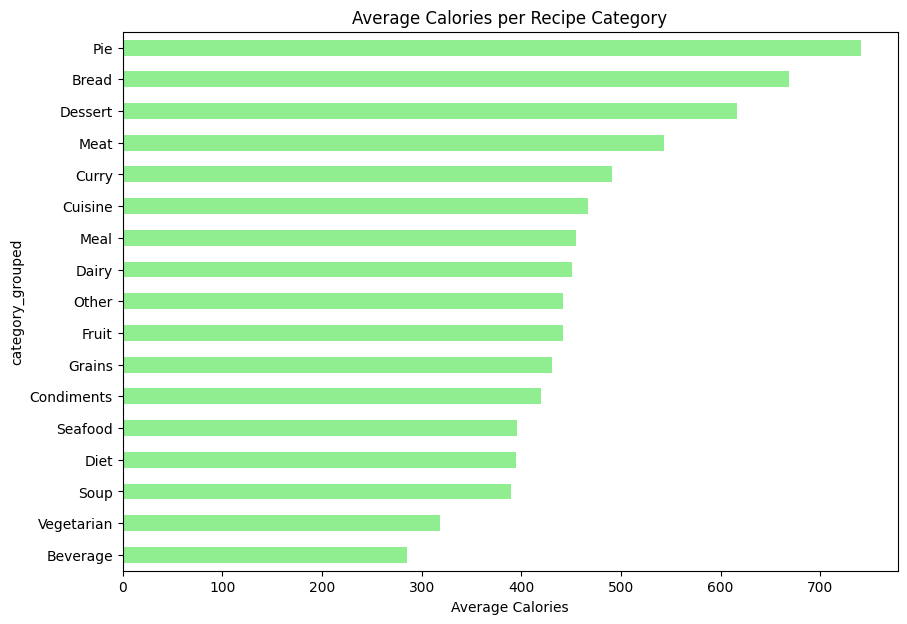

In [58]:
avg_calories_per_category = recipes_df.groupby('category_grouped')['calories'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,7))
avg_calories_per_category.plot(kind='barh', color='lightgreen')
plt.xlabel('Average Calories')
plt.title('Average Calories per Recipe Category')
plt.gca().invert_yaxis()
plt.show()

In [59]:
avg_calories_per_category.head()

,calories
category_grouped,
Pie,740.498717
Bread,668.628795
Dessert,616.893460
Meat,543.424985
Curry,491.051887


Pie has the highest average calories (\~740.5), followed by Bread (\~668.6), Dessert (\~616.9), Meat (\~543.4).

## Which recipes have the most ingredients?

In [60]:
recipes_df['ingredient_count'] = recipes_df['ingredient_name'].apply(len)

recipes_with_most_ingredients = recipes_df.sort_values(by='ingredient_count', ascending=False)

print("Recipes with the most ingredients:")
display(recipes_with_most_ingredients[['name', 'ingredient_count', 'ingredient_name']].head(10))


Recipes with the most ingredients:


,name,ingredient_count,ingredient_name
514536,Marinated Pork Tortas With Cilantro Aioli &amp...,44,"[rice vinegar, white vinegar, granulated sugar..."
487788,12-Minute Gourmet Gravy,43,"[unsalted butter, all-purpose flour, beef brot..."
376024,Quick &amp; Easy Pork Sausage,43,"[ground pork, fennel seed, ground sage, black ..."
470422,My Big Fat Greek Meat &amp; Pasta Casserole,42,"[extra virgin olive oil, lean ground beef, gro..."
394013,Cream of Vegetable Soups - 5 Different,42,"[garlic clove, lemon juice, salt, white pepper..."
397052,Mamma Mia! Fresh Italian Lasagne!,41,"[olive oil, onion, fresh mushrooms, fresh basi..."
35670,Sweet Kolache Recipe,41,"[dry yeast, water, sugar, butter, sugar, milk,..."
517952,Nicker's Pulled Chicken Burritos,41,"[chicken breasts, garlic cloves, salsa, yellow..."
437748,My Big Fat Greek Burgers,40,"[ground lamb, onions, minced garlic clove, fet..."
2236,A-To-Z Bread,39,"[sugar, eggs, vanilla extract, all-purpose flo..."


“My Big Fat Greek Meat & Pasta Casserole” has 808 ingredients making it the recipe with the most ingredients out of all the recipes

## Top reviewers by number of reviews

In [61]:
top_reviewers = combined_df['author_name_review'].value_counts().head(10)
display(top_reviewers)

,count
author_name_review,
Sydney Mike,8842
Sharon123,6605
Boomette,5438
Baby Kato,4693
Annacia,4586
Kittencalrecipezazz,3963
Rita1652,3743
Parsley,3688
PaulaG,3590


## Review accumulation over time

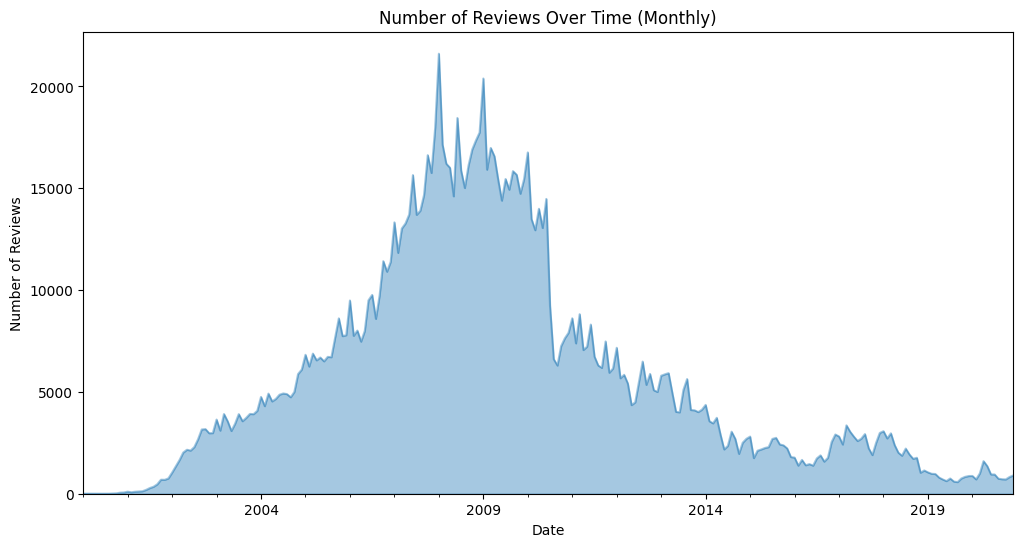

In [62]:
combined_df['date_submitted'] = pd.to_datetime(combined_df['date_submitted'])
reviews_over_time = combined_df.set_index('date_submitted').resample('ME')['review_id'].count()

plt.figure(figsize=(12,6))
reviews_over_time.plot.area(alpha=0.4)
plt.title('Number of Reviews Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

Number of reviews submitted peaked around 2008 and 2009 and decreased through the years

## Is there a relationship between cook time and average rating?

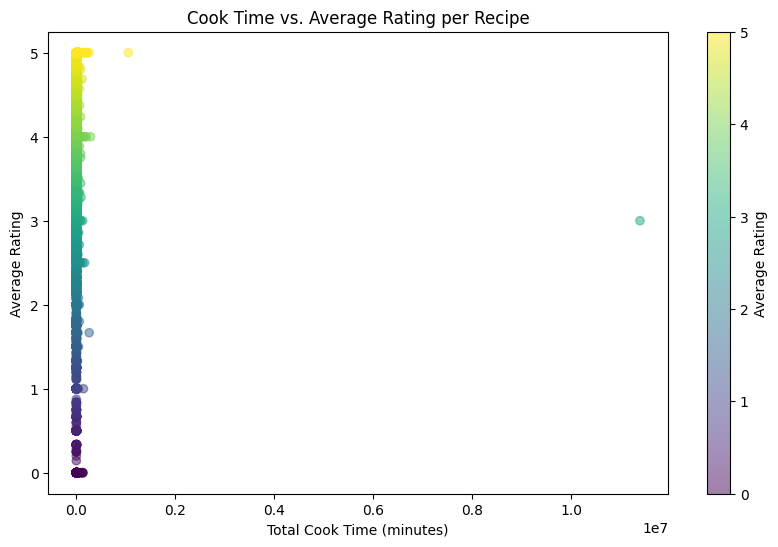

In [63]:
avg_rating_per_recipe = combined_df.groupby('recipe_id')['rating'].mean()
cook_time = recipes_df.set_index('recipe_id')['total_time_min']

scatter_data = pd.concat([cook_time, avg_rating_per_recipe], axis=1).dropna()

plt.figure(figsize=(10,6))
plt.scatter(scatter_data['total_time_min'], scatter_data['rating'], alpha=0.5, c=scatter_data['rating'], cmap='viridis')
plt.colorbar(label='Average Rating')
plt.xlabel('Total Cook Time (minutes)')
plt.ylabel('Average Rating')
plt.title('Cook Time vs. Average Rating per Recipe')
plt.show()

based on the scatter plot, there does not appear to be a strong or clear relationship between total cook time and average rating per recipe

## Who are the top recipe authors by count?

In [64]:
top_recipe_authors = recipes_df['author_name'].value_counts().head(10)

print("Top 10 Recipe Authors by Recipe Count:")
display(top_recipe_authors)

Top 10 Recipe Authors by Recipe Count:


,count
author_name,
ratherbeswimmin,7742
dicentra,6375
Kittencalrecipezazz,3926
internetnut,3435
Chef mariajane,3399
Sharon123,3301
Dancer,3032
gailanng,2841
English_Rose,2260


## Which authors have the highest average rating (min 10 recipes)?

In [67]:
author_rating_summary = recipes_df.groupby('author_name').agg(
    avg_rating=('aggregate_rating', 'mean'),
    recipe_count=('recipe_id', 'count')
)

min_recipes_threshold = 10
consistent_authors = author_rating_summary[author_rating_summary['recipe_count'] >= min_recipes_threshold]

top_consistent_authors = consistent_authors.sort_values(by='avg_rating', ascending=False).head(10)
print(f"Top 10 Recipe Authors with Highest Average Ratings (minimum {min_recipes_threshold} recipes):")
display(top_consistent_authors)


Top 10 Recipe Authors with Highest Average Ratings (minimum 10 recipes):


,avg_rating,recipe_count
author_name,,
A Taste of Brooklyn,5.0,18
Mimi Hall,5.0,15
MinnMomof2,5.0,17
AZ Food Critic,5.0,24
waynemiller,5.0,19
596151,5.0,13
Miss Candiquik,5.0,16
352lillian,5.0,10
Chef Reg Jones,5.0,15


## What are the average cook and prep times by category?

In [68]:
average_times_by_category = recipes_df.groupby('category_grouped')[['cook_time_min', 'prep_time_min', 'total_time_min']].mean()
average_times_by_category_sorted = average_times_by_category.sort_values(by='total_time_min', ascending=False)


average_times_by_category_formatted = average_times_by_category_sorted.applymap(format_minutes)
display(average_times_by_category_formatted)


/tmp/ipython-input-522919650.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  average_times_by_category_formatted = average_times_by_category_sorted.applymap(format_minutes)


,cook_time_min,prep_time_min,total_time_min
category_grouped,,,
Beverage,40.0 hr 56.9 min,2.0 hr 29.3 min,43.0 hr 26.1 min
Diet,2.0 hr 19.6 min,3.0 hr 27.7 min,5.0 hr 47.4 min
Meat,4.0 hr 26.0 min,58.6 min,5.0 hr 24.8 min
Other,2.0 hr 4.4 min,1.0 hr 39.9 min,3.0 hr 44.4 min
Fruit,2.0 hr 8.6 min,48.5 min,2.0 hr 57.5 min
Cuisine,1.0 hr 27.4 min,53.8 min,2.0 hr 21.4 min
Vegetarian,1.0 hr 28.7 min,38.8 min,2.0 hr 7.6 min
Soup,1.0 hr 19.4 min,47.5 min,2.0 hr 6.9 min
Bread,51.5 min,1.0 hr 5.3 min,1.0 hr 56.8 min


In [86]:
beverage_recipes = recipes_df[recipes_df['category_grouped'] == 'Beverage']
top_beverage = beverage_recipes.sort_values(by='total_time_min', ascending=False).iloc[0]

print("Recipe name (beverage category) with highest total time:")
top_beverage['name']

Recipe name (beverage category) with highest total time:


"Caroline Cogswell's Celebrated Morning Tonic (A Coffee Liqueur)"

In [87]:
top_recipe_id = top_beverage['recipe_id']
recipe_reviews = combined_df[combined_df['recipe_id'] == top_recipe_id]

if not recipe_reviews.empty:
    print_recipe_review(recipe_reviews.iloc[0])
else:
    print(f"No reviews found for recipe_id {top_recipe_id}")

No reviews found for recipe_id 50088


Most commonly used ingredients:


,count
salt,199779
butter,136079
sugar,115852
onion,87546
water,84376


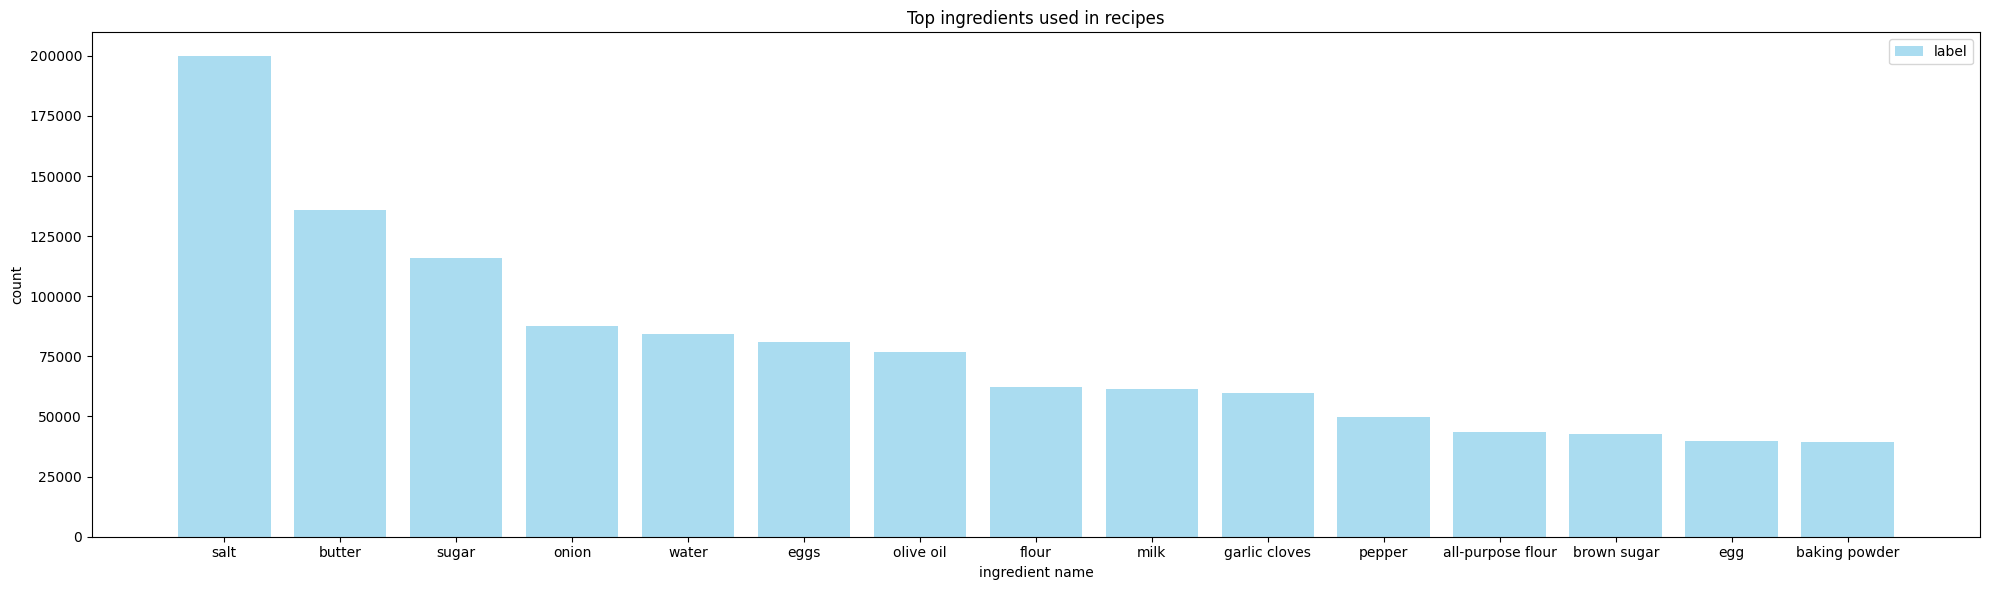

In [89]:
all_ingredients = []

for ingredient_list in recipes_df['ingredient_name'].dropna():
    ingredients = [i.strip().lower() for i in ingredient_list]
    all_ingredients.extend(ingredients)

ing_count = pd.Series(all_ingredients).value_counts()

print("Most commonly used ingredients:")
display(ing_count.head(5))

plt.figure(figsize=(20,6))

x = ing_count.head(15).index
y = ing_count.head(15).values

plt.bar(x, y, color='skyblue', alpha=0.7, label='label')
plt.xlabel('ingredient name')
plt.ylabel('count')
plt.title('Top ingredients used in recipes')
plt.legend()
plt.tight_layout()
plt.show()

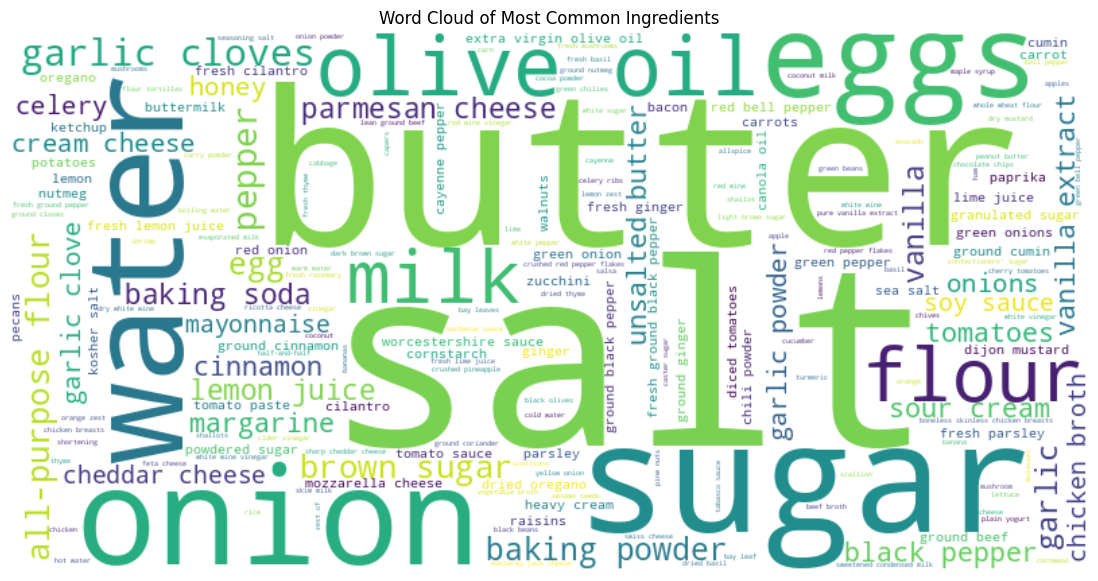

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud = wordcloud.generate_from_frequencies(ing_count.to_dict())

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Ingredients')
plt.show()